<a href="https://colab.research.google.com/github/5791nbm/FinCoLab/blob/main/03%20CAPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capital Asset Pricing Model (CAPM)

E[r<sub>a</sub>] = r<sub>f</sub> + B<sub>a</sub>(E[r<sub>m</sub>] - r<sub>f</sub>)

Expression of linear relationship between any stock and expected return and the market premium


*   E[r<sub>a</sub>] is the Expected return of investment A (a single stock or portfolio)
*   r<sub>f</sub> is the risk free rate of return for a "riskless" asset
*   (E[r<sub>m</sub>] - r<sub>f</sub>) is the excess return of the market premium multiplied by a factor
*   B<sub>a</sub> = Cov(r<sub>a</sub>,r<sub>m</sub>) / Var(r<sub>m</sub>). Defines how risky your portfolio is relative to the market or how much the price of a stock goes up or down relative to the market.

# Linear Regression Formula:

E[r<sub>a</sub>] - r<sub>f</sub> = *a* + B<sub>a</sub>(E[r<sub>m</sub>] - r<sub>f</sub>)




In [1]:
import numpy as np, pandas as pd, yfinance as yf, matplotlib.pyplot as plt
from scipy.stats import norm

RISK_FREE_RATE = 0.05
MONTH_IN_YEAR = 12

https://www.youtube.com/watch?v=037_883wHGo

In [2]:
yf.__version__
# Version 0.2.51 published 12/24/2024
# Key changes include a multi index column and auto adjusted prices for splits, dividends and any other adjustment reasons

'0.2.52'

In [3]:
df_ = yf.download(['IBM', '^GSPC'],start='2024-01-01')
df_.resample('ME').last()
#df_

[*********************100%***********************]  2 of 2 completed


Price            Close                     High                      Low  \
Ticker             IBM        ^GSPC         IBM        ^GSPC         IBM   
Date                                                                       
2024-01-31  176.079269  4845.649902  179.904569  4906.750000  175.580729   
2024-02-29  179.009979  5096.270020  180.770772  5104.990234  178.681045   
2024-03-31  184.747055  5254.350098  185.685482  5264.850098  184.147217   
2024-04-30  160.792618  5035.689941  161.334396  5110.830078  159.883199   
2024-05-31  163.023880  5277.509766  163.141123  5280.330078  160.082894   
2024-06-30  168.984009  5460.479980  169.482323  5523.640137  166.619505   
2024-07-31  187.733948  5522.299805  190.088687  5551.509766  185.633256   
2024-08-31  199.222214  5648.399902  199.261632  5651.370117  195.871116   
2024-09-30  217.899597  5762.479980  218.136150  5765.140137  215.869234   
2024-10-31  203.746170  5705.450195  205.135890  5775.339844  200.582342   
2024-11-30  225.904984  6032.379883  228.835457  6044.169922  225.686438   
2024-12-31  218.375153  5881.629883  219.587080  5929.740234  216.994352   
2025-01-31  254.007751  6040.529785  255.537553  6120.910156  250.222969   
2025-02-28  261.279999  6114.629883  261.940002  6127.470215  257.910004   

Price                          Open                Volume              
Ticker            ^GSPC         IBM        ^GSPC      IBM       ^GSPC  
Date                                                                   
2024-01-31  4845.149902  179.329343  4899.189941  8876100  4696120000  
2024-02-29  5061.890137  180.093535  5085.359863  6458500  5219740000  
2024-03-31  5245.819824  184.727702  5248.029785  3742200  3998270000  
2024-04-30  5035.310059  161.073191  5103.779785  6011600  4082470000  
2024-05-31  5191.680176  161.900242  5243.209961  4905000  5437160000  
2024-06-30  5451.120117  166.932174  5488.479980  4193300  7199220000  
2024-07-31  5493.750000  186.620090  5505.589844  5558400  4546910000  
2024-08-31  5581.790039  196.245654  5612.740234  4751000  4185850000  
2024-09-30  5703.529785  217.475775  5726.520020  3543400  4425730000  
2024-10-31  5702.859863  201.193433  5775.339844  5925300  4425660000  
2024-11-30  6003.979980  226.242730  6003.979980  2640300  2444420000  
2024-12-31  5868.859863  219.259262  5919.740234  2270200  3128350000  
2025-01-31  6030.930176  254.355426  6096.790039  7203500  4843770000  
2025-02-28  6107.620117  259.000000  6115.520020  3922300  4335190000

In [4]:
df_.xs('IBM', axis=1, level='Ticker')

Price,Close,High,Low,Open,Volume
Date,,,,,
2024-01-02,154.833939,156.550048,153.836872,156.109043,3825000
2024-01-03,153.491714,155.054425,153.472536,154.354560,4086100
2024-01-04,154.220367,155.131152,153.558845,153.606785,3212000
2024-01-05,152.590530,153.923156,152.120750,153.309573,4199400
2024-01-08,154.488785,154.565484,151.372932,152.139914,3321700
...,...,...,...,...,...
2025-02-10,249.270004,251.949997,246.869995,250.860001,3564400
2025-02-11,254.699997,256.750000,250.580002,251.100006,4801600
2025-02-12,255.809998,256.399994,252.020004,252.720001,3075300


In [5]:
df_.xs('^GSPC', axis=1, level='Ticker')

Price,Close,High,Low,Open,Volume
Date,,,,,
2024-01-02,4742.830078,4754.330078,4722.669922,4745.200195,3743050000
2024-01-03,4704.810059,4729.290039,4699.709961,4725.069824,3950760000
2024-01-04,4688.680176,4726.779785,4687.529785,4697.419922,3715480000
2024-01-05,4697.240234,4721.490234,4682.109863,4690.569824,3844370000
2024-01-08,4763.540039,4764.540039,4699.819824,4703.700195,3742320000
...,...,...,...,...,...
2025-02-10,6066.439941,6073.379883,6044.839844,6046.399902,4458760000
2025-02-11,6068.500000,6076.279785,6042.339844,6049.319824,4324880000
2025-02-12,6051.970215,6063.000000,6003.000000,6025.080078,4627960000


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



            s_adjclose   m_adjclose  s_returns  m_returns
Date                                                     
2010-01-31   68.628738  1073.869995  -0.067221  -0.037675
2010-02-28   71.622368  1104.489990   0.042696   0.028115
2010-03-31   72.236298  1169.430054   0.008535   0.057133
2010-04-30   72.658768  1186.689941   0.005831   0.014651
2010-05-31   70.913864  1089.410034  -0.024308  -0.085532
...                ...          ...        ...        ...
2016-08-31  104.143936  2170.949951  -0.002293  -0.001220
2016-09-30  104.124245  2168.270020  -0.000189  -0.001235
2016-10-31  100.741943  2126.149902  -0.033023  -0.019617
2016-11-30  107.297905  2198.810059   0.063047   0.033604
2016-12-31  109.791534  2238.830078   0.022974   0.018037

[84 rows x 4 columns]
Beta from the formula:  0.7301126296699864
Beta from the regression:  0.7301126296699862
Expected return:  0.08619370419029898


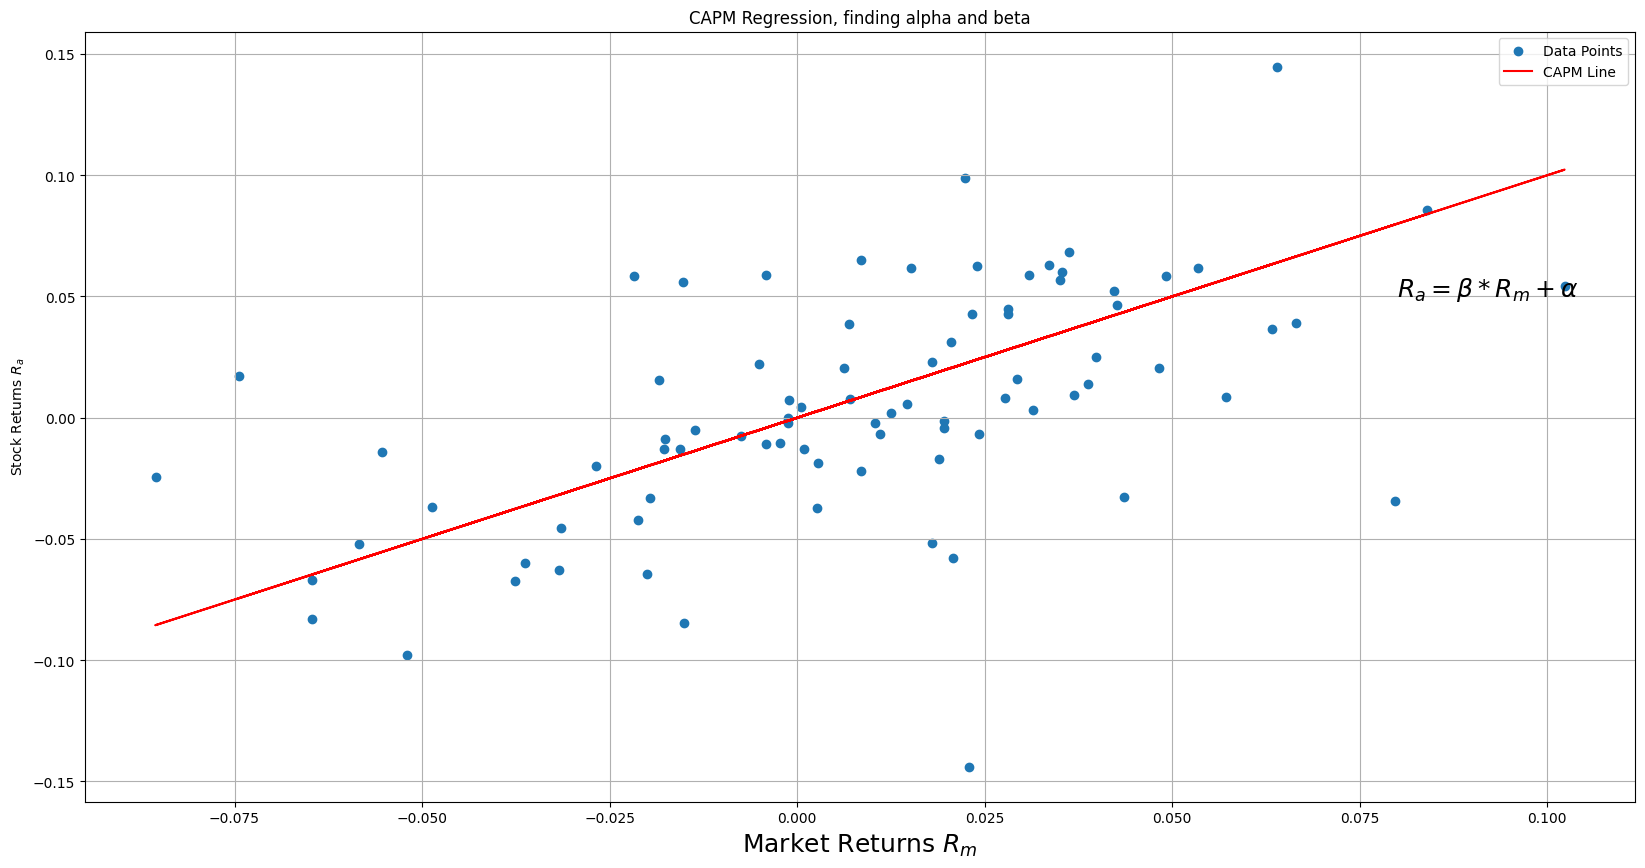

In [6]:
class CAPM:
  def __init__(self, stocks, start_date, end_date):
    self.data = None
    self.stocks = stocks
    self.start_date = start_date
    self.end_date = end_date

  def download_data(self):
    data = {}
    for stock in self.stocks:
      ticker = yf.download(stock, self.start_date, self.end_date, auto_adjust= False)
      #This is a line of code I added to handle changes with yfinance library
      ticker = ticker.xs(stock, axis= 1, level= 'Ticker')
      data[stock] = ticker['Adj Close']
      #This line of code remnames the column to the stock ticket symbol
      ticker = ticker.rename(columns= {'Adj Close': stock})
    return pd.DataFrame(data)

  def initialize(self):
    stock_data = self.download_data()
    '''
    I used ".resample('ME').last()" to get the price of the stock at the end of the month 'M' depricated, now 'ME'
    Use daily returns if you want to deal with micro data for short-term forecasting. Use monthly returns since they are approximately
    normally distributed, which is a key assmuption of the CAPM.
    '''
    stock_data = stock_data.resample('ME').last()
    print()
    #print(stock_data)
    self.data = pd.DataFrame({'s_adjclose':stock_data[self.stocks[0]], 'm_adjclose': stock_data[self.stocks[1]]})

    #logarithmic monthly returns
    self.data[['s_returns', 'm_returns']] = np.log(self.data[['s_adjclose', 'm_adjclose']]/ self.data[['s_adjclose', 'm_adjclose']].shift(1))
    self.data.dropna(inplace=True)
    print(self.data)

  def calc_beta(self):
    '''
    covar matrix: the diagonal items are the variance
    off diagonal are the covariances
    the matrix is symmetric: cov[0,1] = cov[1,0]
    '''
    covariance_matrix = np.cov(self.data['s_returns'], self.data['m_returns'])
    beta = covariance_matrix[0,1]/covariance_matrix[1,1]
    print("Beta from the formula: ", beta)

  def regression(self):
    '''
    Use a linear regression to calculate the beta
    '''
    beta, alpha = np.polyfit(self.data['m_returns'], self.data['s_returns'], deg= 1) #deg=1 is linear, deg=2 poly is degree 2
    print("Beta from the regression: ", beta)
    #Calculate the expected return according to CAPM formula. Since we are after annual return we multiple by 12
    expected_return = RISK_FREE_RATE + beta * (self.data['m_returns'].mean() * MONTH_IN_YEAR - RISK_FREE_RATE)
    print("Expected return: ", expected_return)
    #self.plot_regression(alpha, beta)

  def plot_regression(self, alpha, beta):
    fig, axis = plt.subplots(1, figsize=(20,10))
    axis.scatter(self.data['m_returns'], self.data['s_returns'], label='Data Points')
    axis.plot(self.data['m_returns'], beta * self.data['m_returns'] + alpha, color='red', label='CAPM Line')
    plt.title('CAPM Regression, finding alpha and beta')
    plt.xlabel('Market Returns $R_m$', fontsize= 18)
    plt.ylabel('Stock Returns $R_a$')
    plt.text(0.08, 0.05, r'$R_a = \beta * R_m + \alpha$', fontsize= 18)
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == '__main__':
  capm = CAPM(['IBM', '^GSPC'], '2009-12-01', '2017-01-01')
  capm.initialize()
  capm.calc_beta()
  capm.regression()
  capm.plot_regression(0, 1)

[*********************100%***********************]  1 of 1 completed


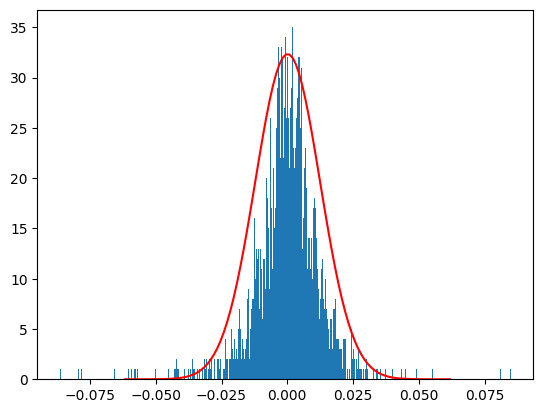

In [7]:
def download_data(stock, start_date, end_date):
  data = {}
  ticker = yf.download(stock, start_date, end_date, auto_adjust= False).xs(stock, axis= 1, level= 'Ticker')
  data['Price'] = ticker['Adj Close']
  return pd.DataFrame(data)

def calculate_returns(stock_data):
  stock_data['Price'] = np.log(stock_data['Price'] / stock_data['Price'].shift(1))
  stock_data.dropna(inplace=True)
  return stock_data

def show(stock_data):
  plt.hist(stock_data, bins=700)
  stock_variance = stock_data.var()
  stock_mean = stock_data.mean()
  sigma = np.sqrt(stock_variance)
  x = np.linspace(stock_mean - 5 * sigma, stock_mean + 5 * sigma, 100)
  plt.plot(x, norm.pdf(x, stock_mean, sigma), color='red')
  plt.show()

if __name__ == '__main__':
  stock_data = download_data('IBM', '2009-12-01', '2020-01-01')
  show(calculate_returns(stock_data))